In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [256]:
def ax_line_attribute_setter(ax_index, marker_index, line_index, marker,
                             markeredgecolor,marker_fill_color, markersize,
                             linewidth, color, linestyle):
    """docstrings to add"""
    axes[ax_index].get_lines()[marker_index].set_marker(marker)
    axes[ax_index].get_lines()[marker_index].set_markerfacecolor(marker_fill_color)
    axes[ax_index].get_lines()[marker_index].set_markeredgecolor(markeredgecolor)
    axes[ax_index].get_lines()[marker_index].set_markersize(markersize)
    axes[ax_index].get_lines()[line_index].set_linewidth(linewidth)
    axes[ax_index].get_lines()[line_index].set_color(color)
    axes[ax_index].get_lines()[line_index].set_linestyle(linestyle)


In [257]:
data = pd.read_csv("real_estate_PML.csv", sep = ",")
data.head()

,type_l,ville,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
0,appartement,Paris,17,3.0,1.0,51.84,535000.0,10320.0
1,appartement,Paris,15,3.0,2.0,40.77,470000.0,11528.0
2,appartement,Paris,13,2.0,1.0,39.00,385000.0,9871.0
3,appartement,Paris,13,2.0,1.0,36.03,383000.0,10630.0
4,appartement,Paris,10,2.0,1.0,40.70,399000.0,9803.0


In [258]:
# Drop type_l column, as we filtered the listings to be appartment only in the cleaning process
data = data.drop(columns="type_l")

In [259]:
data.head()

,ville,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
0,Paris,17,3.0,1.0,51.84,535000.0,10320.0
1,Paris,15,3.0,2.0,40.77,470000.0,11528.0
2,Paris,13,2.0,1.0,39.00,385000.0,9871.0
3,Paris,13,2.0,1.0,36.03,383000.0,10630.0
4,Paris,10,2.0,1.0,40.70,399000.0,9803.0


In [260]:
# Set city as index
df = data.set_index("ville").copy()

In [261]:
df.head()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
ville,,,,,,
Paris,17,3.0,1.0,51.84,535000.0,10320.0
Paris,15,3.0,2.0,40.77,470000.0,11528.0
Paris,13,2.0,1.0,39.00,385000.0,9871.0
Paris,13,2.0,1.0,36.03,383000.0,10630.0
Paris,10,2.0,1.0,40.70,399000.0,9803.0


In [262]:
containers = [0,20,40,80,160,df['surface_m2'].max()]
df['largeur'] = pd.cut(df['surface_m2'], containers, labels = ['Très Petit', 'Petit', 'Moyen', 'Grand', 'Très Grand' ])
df.head()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2,largeur
ville,,,,,,,
Paris,17,3.0,1.0,51.84,535000.0,10320.0,Moyen
Paris,15,3.0,2.0,40.77,470000.0,11528.0,Moyen
Paris,13,2.0,1.0,39.00,385000.0,9871.0,Petit
Paris,13,2.0,1.0,36.03,383000.0,10630.0,Petit
Paris,10,2.0,1.0,40.70,399000.0,9803.0,Moyen


In [263]:
df_paris = df[df.index == 'Paris'].copy()
df_paris.describe()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
count,2921.000000,2921.000000,2921.000000,2921.000000,2.921000e+03,2921.000000
mean,13.765491,2.947963,1.508388,69.240381,8.919190e+05,12271.282438
std,4.810390,1.484404,1.176255,48.125717,8.947860e+05,3933.846575
min,2.000000,0.000000,0.000000,6.000000,6.000000e+04,2294.000000
25%,11.000000,2.000000,1.000000,38.600000,4.180000e+05,9983.000000
50%,15.000000,3.000000,1.000000,58.420000,6.400000e+05,11437.000000
75%,18.000000,4.000000,2.000000,86.000000,1.030000e+06,13626.000000
max,20.000000,11.000000,6.000000,427.600000,1.400000e+07,46005.000000


In [264]:
q1_pmc, q2_pmc, q3_pmc, q4_pmc = df_paris['prix_m2'].quantile([0.25, 0.5, 0.75, 1])
q1_prix, q2_prix, q3_prix, q4_prix = df_paris['prix'].quantile([0.25, 0.5, 0.75, 1])
iqr_pmc = q3_pmc - q1_pmc
iqr_prix = q3_prix - q1_prix
lower_prix = q1_prix- 3*iqr_prix
upper_prix = q3_prix + 3*iqr_prix
lower_pmc = q1_pmc - 3*iqr_pmc
upper_pmc = q3_pmc + 3*iqr_pmc

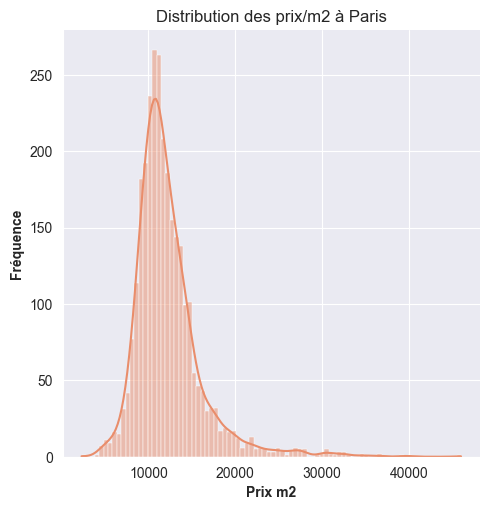

In [265]:
sns.set_style("darkgrid")
sns.displot(kind = 'hist', data = df_paris, x = 'prix_m2', kde = True)
plt.xlabel("Prix m2")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 à Paris")
plt.show()

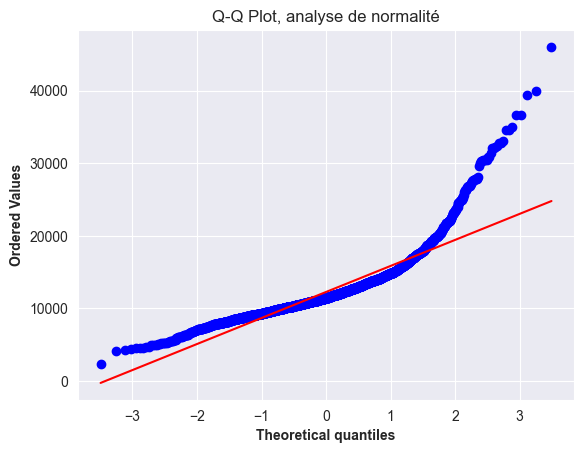

In [266]:
sns.set_style("darkgrid")
st.probplot(df_paris['prix_m2'], dist='norm', plot = plt)
plt.title('Q-Q Plot, analyse de normalité')
plt.show()

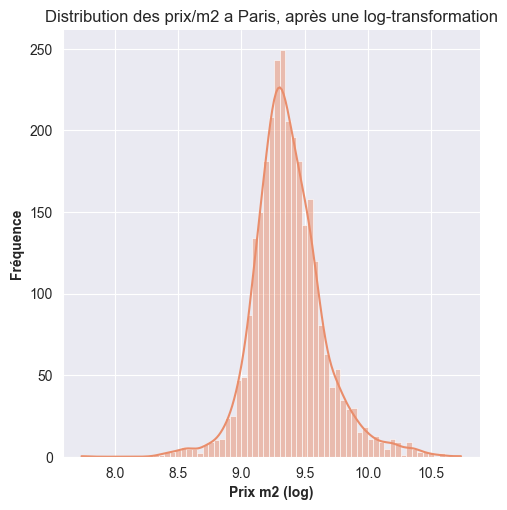

In [267]:
df_paris['prix_m2_log'] = np.log(df_paris['prix_m2'])
palette = sns.color_palette("flare")
sns.set_palette(palette)
sns.displot(kind = 'hist', data = df_paris, x = 'prix_m2_log', kde = True)
plt.xlabel("Prix m2 (log)")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 a Paris, après une log-transformation")
plt.show()

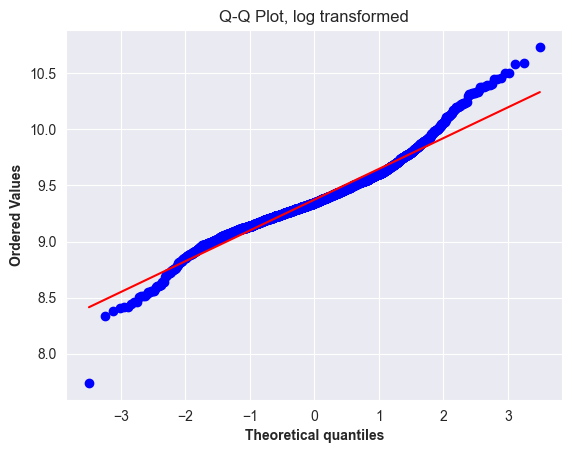

In [268]:
sns.set_style("darkgrid")
st.probplot(df_paris['prix_m2_log'], dist='norm', plot=plt)
plt.title('Q-Q Plot, log transformed')
plt.show()

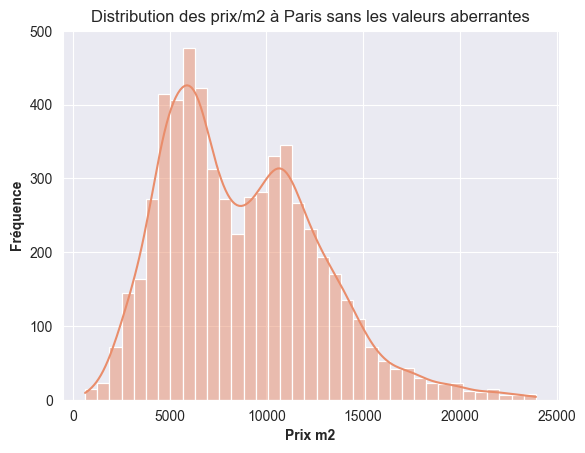

In [269]:
norm_mask = (df['prix_m2']>lower_pmc) & (df['prix_m2']<upper_pmc)
prix_m2_no_outliers = df.loc[norm_mask, 'prix_m2']
sns.set_style("darkgrid")
sns.histplot(data = prix_m2_no_outliers, kde = True)
plt.xlabel("Prix m2")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 à Paris sans les valeurs aberrantes")
plt.show()

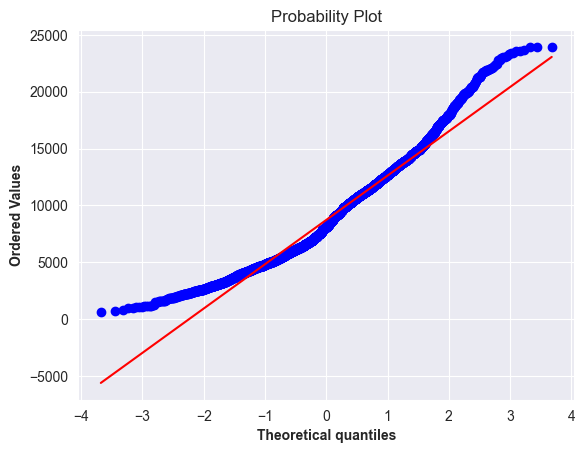

In [270]:
sns.set_style("darkgrid")
st.probplot(prix_m2_no_outliers, dist='norm',plot=plt)
plt.show()

In [271]:
df_paris['arr'] = df_paris['arr'].astype('category')
df_paris['arr'] = df_paris['arr'].cat.remove_unused_categories()
result = df_paris.groupby('arr')['prix_m2'].mean().reset_index().sort_values('prix_m2', ascending = False)
sns.set_style('white')

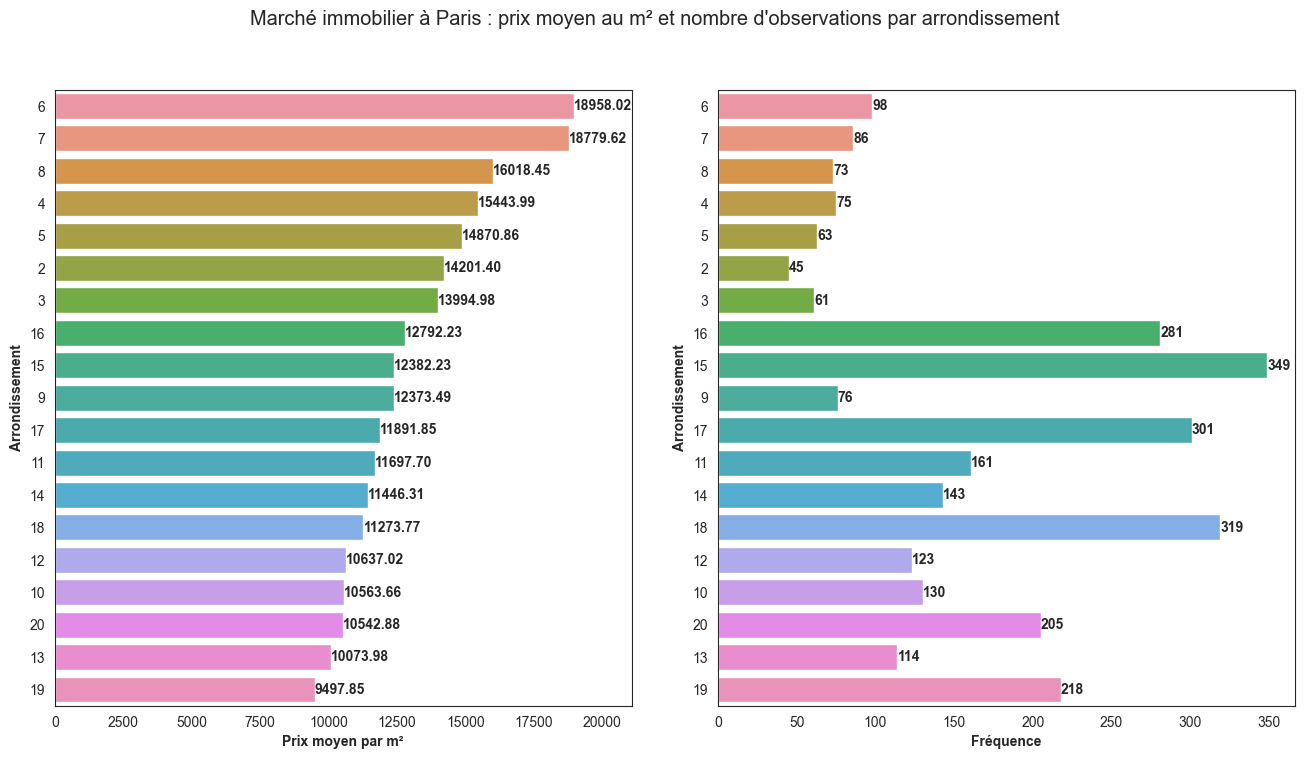

In [272]:
sns.set_style('white')
fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
sns.barplot(data=df_paris, x='prix_m2', y='arr', errwidth=0, order=result['arr'], ax=axs[0])
axs[0].set(xlabel='Prix moyen par m²', ylabel='Arrondissement')
for i in axs[0].containers:
    axs[0].bar_label(i, labels=[f"{h.get_width():.2f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')

sns.countplot(data=df_paris, y='arr', order=result['arr'], ax=axs[1])
axs[1].set(xlabel='Fréquence', ylabel='Arrondissement')
for i in axs[1].containers:
    axs[1].bar_label(i, labels=[f"{h.get_width():.0f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')
plt.subplots_adjust(wspace=0.15)
plt.rc("axes", labelweight="bold")
plt.suptitle("Marché immobilier à Paris : prix moyen au m² et nombre d'observations par arrondissement", fontsize = 'x-large')
plt.show()

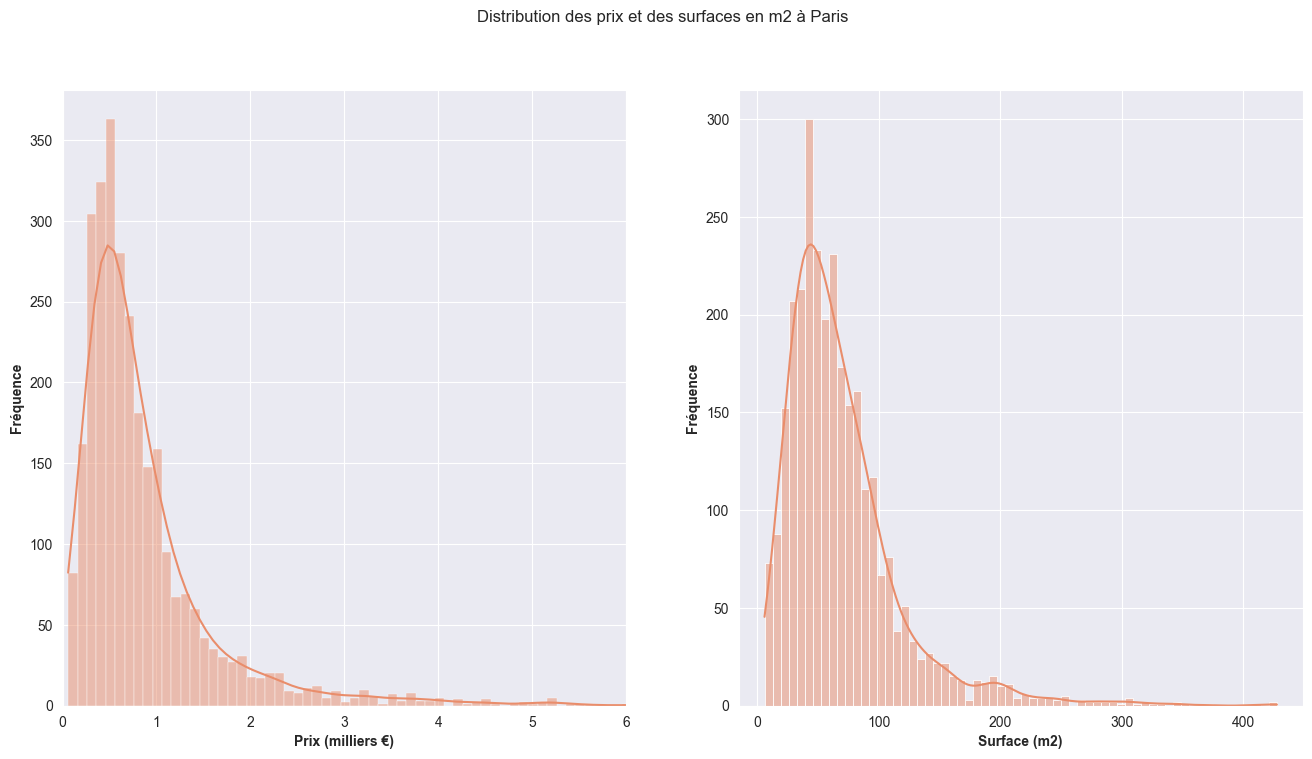

In [273]:
sns.set_style('darkgrid')
df_paris['prix_mil_euros'] = df_paris['prix']/1e6
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
sns.histplot(data=df_paris, x='prix_mil_euros', binwidth=0.1, kde = True, ax = axes[0])
axes[0].set(xlabel='Prix (milliers €)', ylabel='Fréquence')
axes[0].set_xlim(0,6)
sns.histplot(data=df_paris, x='surface_m2', kde=True, ax = axes[1])
axes[1].set(xlabel='Surface (m2)', ylabel='Fréquence')
plt.suptitle('Distribution des prix et des surfaces en m2 à Paris')
plt.show()

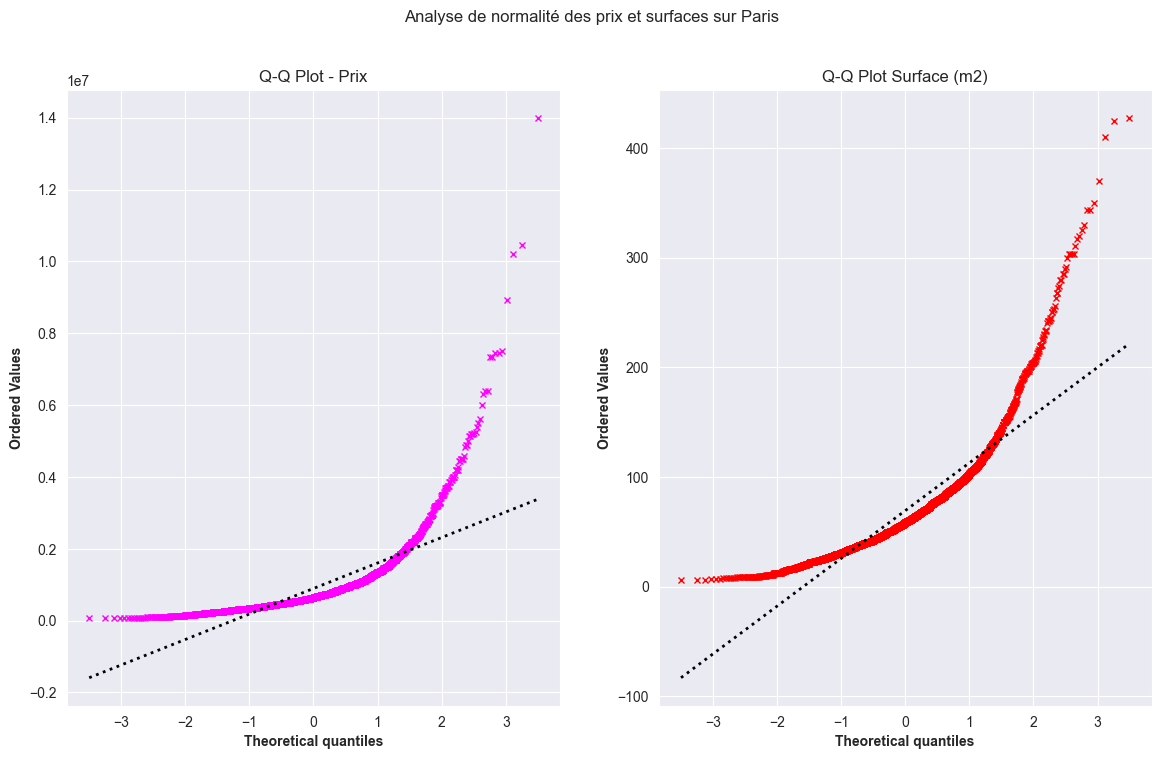

In [274]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols = 2, figsize=(14,8))
st.probplot(df_paris['prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des prix et surfaces sur Paris")
axes[0].set_title("Q-Q Plot - Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='magenta',
                         marker_fill_color='magenta', markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['surface_m2'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='red',
                         marker_fill_color='red',markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
plt.show()

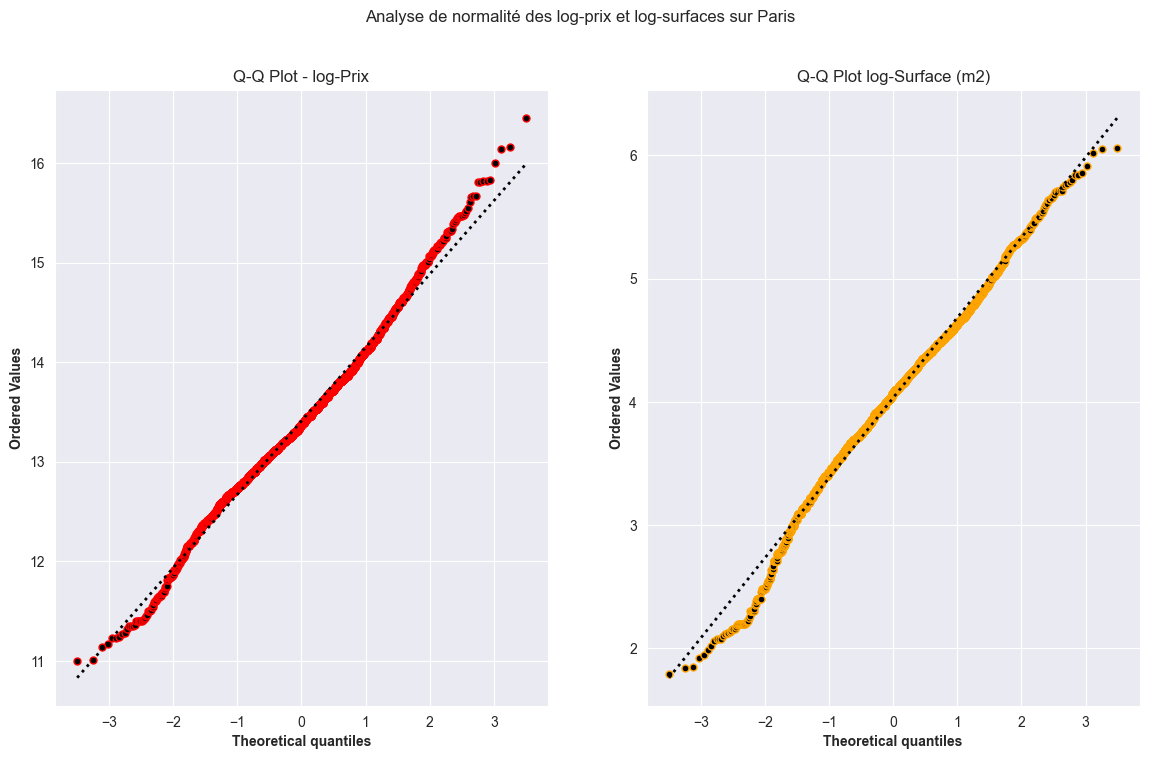

In [275]:
df_paris['log_prix'], df_paris['log_surface'] = np.log(df_paris['prix']), np.log(df_paris['surface_m2'])
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols = 2, figsize=(14,8))
st.probplot(df_paris['log_prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des log-prix et log-surfaces sur Paris")
axes[0].set_title("Q-Q Plot - log-Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1, marker='o',
                         marker_fill_color='black', markeredgecolor='red',
                         markersize=5, linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['log_surface'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot log-Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1, marker='o',
                         markeredgecolor='orange', markersize=5, linewidth=2,
                         marker_fill_color='black', color='black', linestyle='dotted')
plt.show()

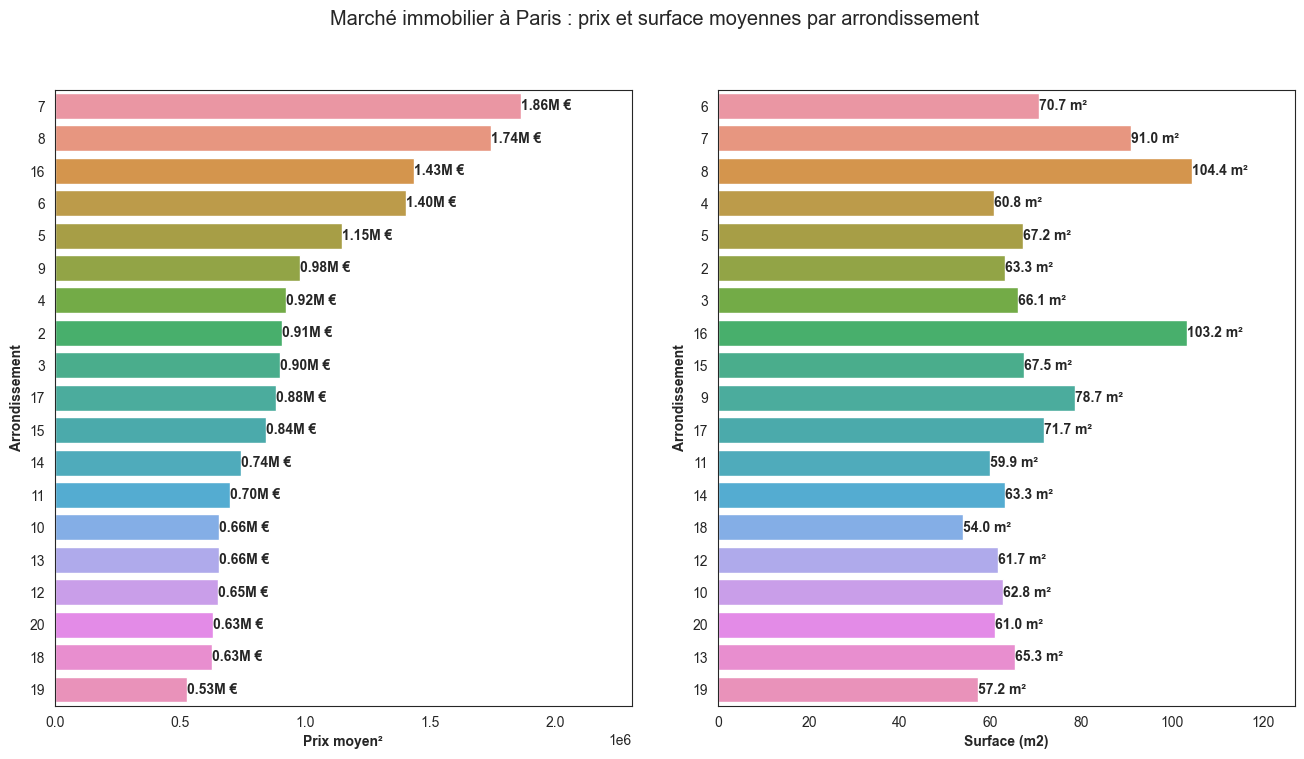

In [276]:
result_prix_paris = df_paris.groupby('arr')['prix'].mean().reset_index().sort_values('prix', ascending = False)
sns.set_style('white')
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
sns.barplot(data=df_paris, x='prix', y='arr', errwidth=0, order=result_prix_paris['arr'], ax=axs[0])
axs[0].set(xlabel='Prix moyen²', ylabel='Arrondissement')
for i in axs[0].containers:
    axs[0].bar_label(i, labels=[f"{h.get_width()/1e6:.2f}M €" for h in i], label_type='edge', fontsize=10, fontweight='bold')

sns.barplot(data=df_paris, x = 'surface_m2', y='arr', order=result['arr'], errwidth=0, ax=axs[1])
axs[1].set(xlabel='Surface (m2)', ylabel='Arrondissement')
for i in axs[1].containers:
    axs[1].bar_label(i, labels=[f"{h.get_width():.1f} m²" for h in i], label_type='edge', fontsize=10, fontweight='bold')
plt.subplots_adjust(wspace=0.15)
plt.rc("axes", labelweight="bold")
plt.suptitle("Marché immobilier à Paris : prix et surface moyennes par arrondissement", fontsize = 'x-large')
plt.show()

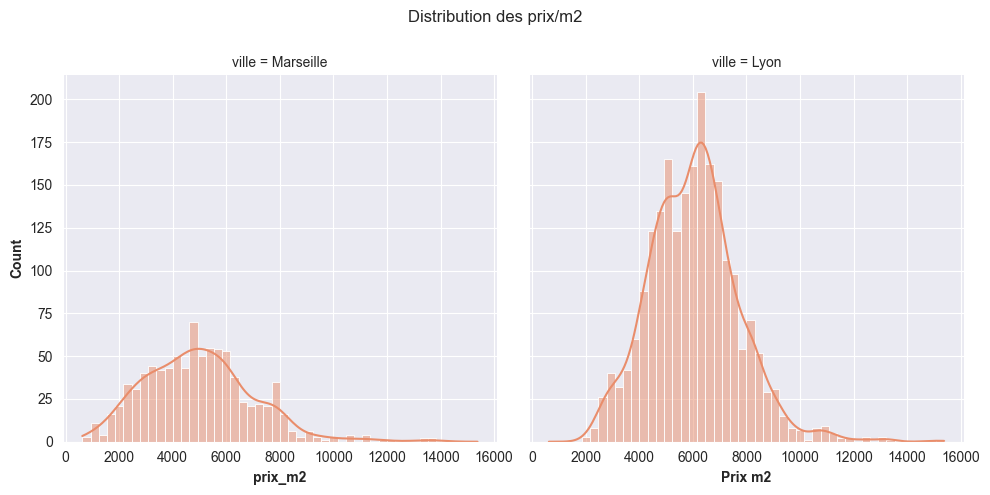

In [277]:
df_lyon_mars = df.reset_index()
df_lyon_mars = df_lyon_mars.loc[df_lyon_mars['ville']!="Paris",].reset_index(drop=True)
sns.set_style("darkgrid")
sns.displot(kind = 'hist', data = df_lyon_mars, x = 'prix_m2', kde = True, col="ville")
plt.subplots_adjust(top=0.85)
plt.suptitle("Distribution des prix/m2")
plt.xlabel("Prix m2")
plt.ylabel("Fréquence")
plt.show()

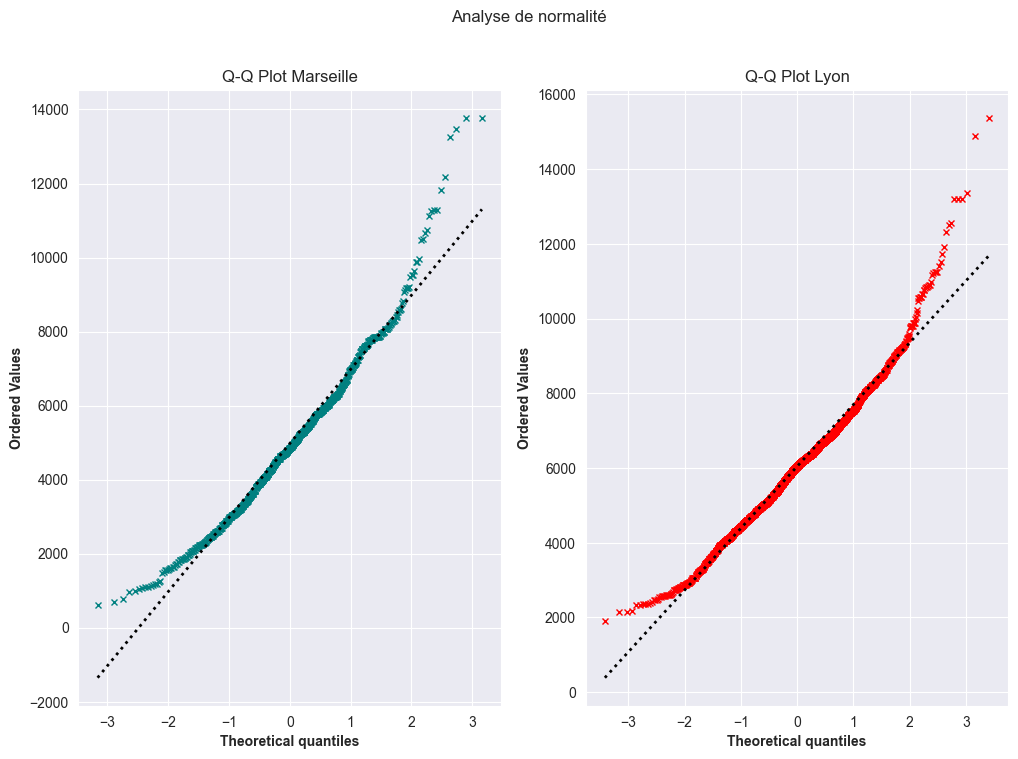

In [278]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols = 2, figsize=(12,8))
st.probplot(df_lyon_mars.loc[df_lyon_mars['ville'] == 'Marseille', 'prix_m2'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité")
axes[0].set_title("Q-Q Plot Marseille")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='teal',
                         markersize=5, marker_fill_color= 'teal',
                         linewidth=2, color='black', linestyle='dotted')
st.probplot(df_lyon_mars.loc[df_lyon_mars['ville'] == 'Lyon', 'prix_m2'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot Lyon")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='red', markersize=5,
                         marker_fill_color='red', linewidth=2,
                         color='black', linestyle='dotted')
plt.show()


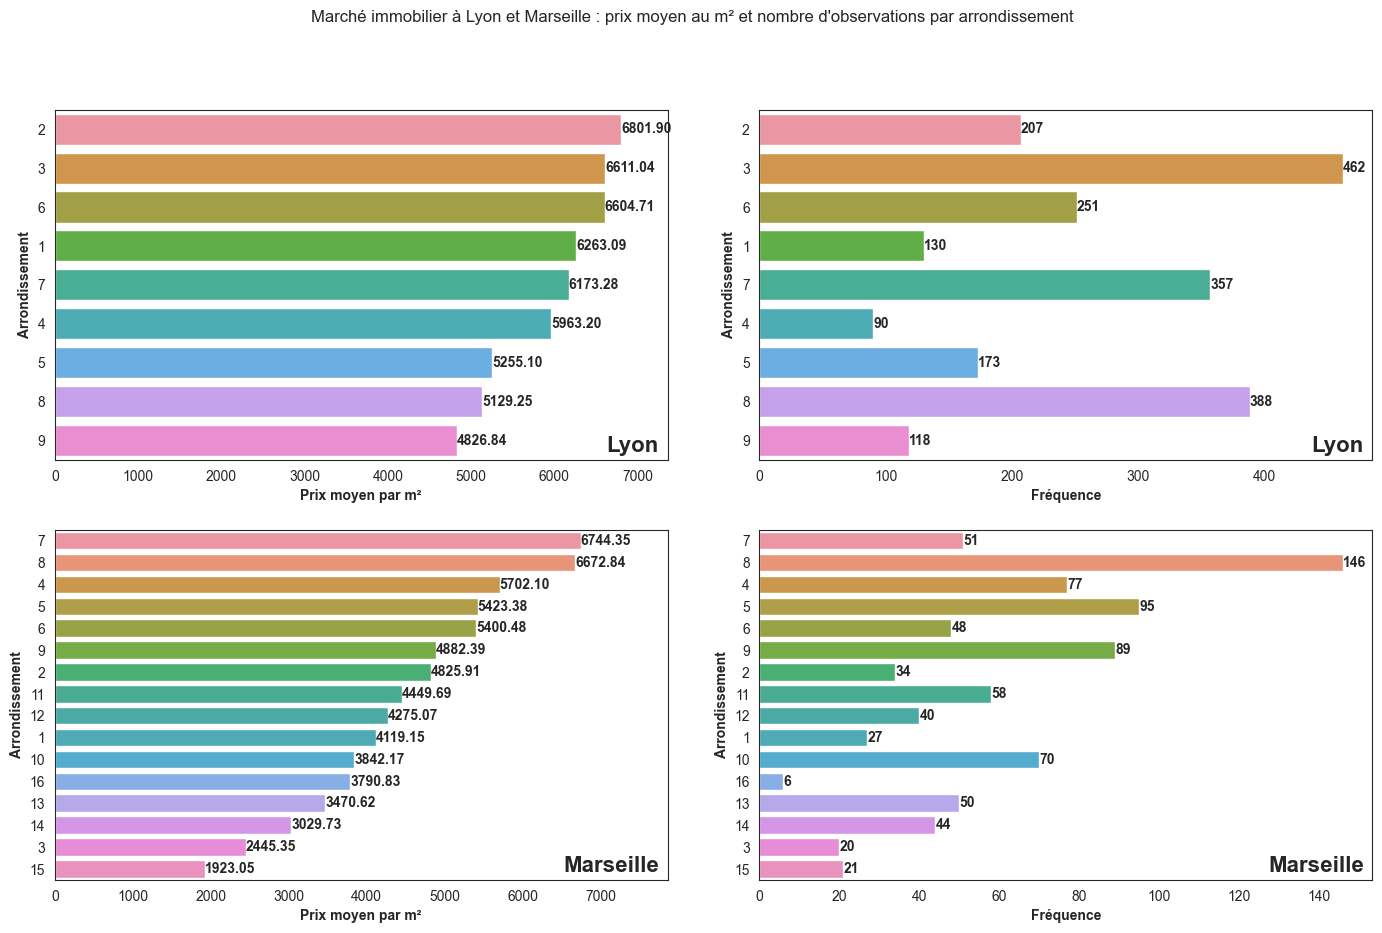

In [279]:
df_lyon_mars['arr'] = df_lyon_mars['arr'].astype('category')
df_lyon = df_lyon_mars[df_lyon_mars['ville']=='Lyon'].copy()
df_marseille = df_lyon_mars[df_lyon_mars['ville']=='Marseille'].copy()
df_lyon['arr'] = df_lyon['arr'].cat.remove_unused_categories()
df_marseille['arr'] = df_marseille['arr'].cat.remove_unused_categories()
result_lyon = df_lyon.groupby('arr')['prix_m2'].mean().reset_index().sort_values('prix_m2', ascending = False)
result_marseille = df_marseille.groupby('arr')['prix_m2'].mean().reset_index().sort_values('prix_m2', ascending = False)
sns.set_style('white')
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(17, 10))
sns.barplot(data=df_lyon, x='prix_m2', y='arr', errwidth=0, order=result_lyon['arr'], ax=axs[0][0])
axs[0][0].set(xlabel='Prix moyen par m²', ylabel='Arrondissement')
for i in axs[0][0].containers:
    axs[0][0].bar_label(i, labels=[f"{h.get_width():.2f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')
axs[0][0].text(0.9, 0.07, 'Lyon', transform=axs[0][0].transAxes, fontsize=16, fontweight='bold', va='top')

sns.countplot(data=df_lyon, y='arr', order=result_lyon['arr'], ax=axs[0][1])
axs[0][1].set(xlabel='Fréquence', ylabel='Arrondissement')
for i in axs[0][1].containers:
    axs[0][1].bar_label(i, labels=[f"{h.get_width():.0f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')
axs[0][1].text(0.9, 0.07, 'Lyon', transform=axs[0][1].transAxes, fontsize=16, fontweight='bold', va='top')

sns.barplot(data=df_marseille, x='prix_m2', y='arr', errwidth=0, order=result_marseille['arr'], ax=axs[1][0])
axs[1][0].set(xlabel='Prix moyen par m²', ylabel='Arrondissement')
for i in axs[1][0].containers:
    axs[1][0].bar_label(i, labels=[f"{h.get_width():.2f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')
axs[1][0].text(0.83, 0.07, 'Marseille', transform=axs[1][0].transAxes, fontsize=16, fontweight='bold', va='top')

sns.countplot(data=df_marseille, y='arr', order=result_marseille['arr'], ax=axs[1][1])
axs[1][1].set(xlabel='Fréquence', ylabel='Arrondissement')
for i in axs[1][1].containers:
    axs[1][1].bar_label(i, labels=[f"{h.get_width():.0f}" for h in i], label_type='edge', fontsize=10, fontweight='bold')
axs[1][1].text(0.83, 0.07, 'Marseille', transform=axs[1][1].transAxes, fontsize=16, fontweight='bold', va='top')

plt.subplots_adjust(wspace=0.15)
plt.rc("axes", labelweight="bold")
plt.suptitle("Marché immobilier à Lyon et Marseille : prix moyen au m² et nombre d'observations par arrondissement")
plt.show()
